In [1]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import math

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 16.5
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['axes.labelsize']= 20
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

# Prepare data --> SKIP

In [5]:
# # read data
# dependencies=pd.read_csv('../icsr2018/npm-dependencies-nov.csv',
#                                 sep=',', dtype=object, index_col=None)
# versions=pd.read_csv('../icsr2018/npm-versions-nov.csv',
#                                 sep=',', dtype=object, index_col=None)
# # get only npm packages
# # dependencies=dependencies.query('Platform=="NPM"')
# # versions=versions.query('Platform=="NPM"')
# # print(len(dependencies),len(versions))

# #get only important columns
# # dependencies=dependencies.loc[:,['Project Name','Version Number','Dependency Name','Dependency Kind','Dependency Requirements']]
# # versions=versions.loc[:,['Project Name','Number','Published Timestamp']]

# # create and id
# versions['id']=versions['Project name']+';'+versions['Version number']
# dependencies['id']=dependencies['Project name']+';'+dependencies['Version number']

# # get only id and date
# versions=versions.loc[:,['id','Version date']]

# # merge 
# dev_dep=pd.merge(dependencies,versions, on='id', how='outer')
# dev_dep.dropna(inplace=True)
# #dev_dep['Published Package']=dev_dep['Published Timestamp'].apply(lambda x: str(x).split()[0])
# dev_dep.drop(['id'], axis=1, inplace=True)
# dev_dep.rename(columns = {'Project name':'package','Version number':'package_version',
#                           'Dependency name':'dependency','Dependency requirements':'dependency_requirements',
#                          'Dependency kind':'dependency_kind','Version date':'version_date'}, inplace=True)
# dev_dep=dev_dep[['dependency','package','package_version','dependency_requirements','dependency_kind','version_date']]
# dev_dep.sort_values(['dependency'],ascending=False, inplace=True)
# len(dev_dep)

# #SAVE DATA
# #dev_dep.to_csv('../icsr2018/dependencies_versions_15June17.csv', index=False)

46948071

# LOAD DATA --> Skip

In [28]:
# dep_ver['Dots_in_Req']=dep_ver['dependency_constraint'].apply(lambda x: len(str(x).split('.'))-1)
# dep_ver['Space_in_Req']=dep_ver['Dependency Requirements'].apply(lambda x: len(str(x).split())-1)
# dep_ver['git']=dep_ver['Dependency Requirements'].apply(lambda x: 'git' in str(x))
# dep_ver['or1']=dep_ver['Dependency Requirements'].apply(lambda x: '|' in str(x))
# dep_ver['or2']=dep_ver['Dependency Requirements'].apply(lambda x: 'or' in str(x))
# dep_ver['and1']=dep_ver['Dependency Requirements'].apply(lambda x: '&' in str(x))
# dep_ver['and2']=dep_ver['Dependency Requirements'].apply(lambda x: 'and' in str(x))
# dep_ver['dieze']=dep_ver['Dependency Requirements'].apply(lambda x: '#' in str(x))
# dep_ver['tilde']=dep_ver['Dependency Requirements'].apply(lambda x: '~' in str(x))
# dep_ver['caret']=dep_ver['Dependency Requirements'].apply(lambda x: '^' in str(x))
# dep_ver['greater']=dep_ver['Dependency Requirements'].apply(lambda x: '>' in str(x))
# dep_ver['greaterEqual']=dep_ver['Dependency Requirements'].apply(lambda x: '>=' in str(x))
# dep_ver['lesser']=dep_ver['Dependency Requirements'].apply(lambda x: '<' in str(x))
# dep_ver['lesserEqual']=dep_ver['Dependency Requirements'].apply(lambda x: '<=' in str(x))
# dep_ver['equal']=dep_ver['Dependency Requirements'].apply(lambda x: '=' in str(x))
# dep_ver['latest']=dep_ver['Dependency Requirements'].apply(lambda x: 'latest' in str(x))
# dep_ver['file']=dep_ver['Dependency Requirements'].apply(lambda x: 'file:' in str(x))
# dep_ver['slash']=dep_ver['Dependency Requirements'].apply(lambda x: '/' in str(x))
# dep_ver['alpha']=dep_ver['Dependency Requirements'].apply(lambda x: 'alpha' in str(x))
# dep_ver['beta']=dep_ver['Dependency Requirements'].apply(lambda x: 'beta' in str(x))

# # easy_ones=dep_ver.query('Dots_in_Req==2 and Space_in_Req==0 and git==False and or1==False and or2==False and and1==False and and2==False and file==False and slash==False and dieze==False')

In [53]:
versions=pd.read_csv('../icsr2018/csv/NPM-versions.csv', sep=',', dtype=object, index_col=None,  error_bad_lines=False)

# Begin Analysis : final_depends_exact_15-11.csv

In [2]:
dep_ver=pd.read_csv('../icsr2018/csv/final_depends_exact_15-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
#deps_time_caret0['dieze']=deps_time_caret0['dieze'].apply(lambda ver: (ver.split('#')[1].split('.')[0]+'.'+ver.split('#')[1].split('.')[1]) in (ver.split('#')[0].split('.')[0]+'.'+ver.split('#')[0].split('.')[1])) 

In [3]:
dep_ver['type']='other'
dep_ver['type']=dep_ver['dependency_constraint'].apply(lambda x: 
                                                       'caret' if str(x).replace(' ','').startswith('^') 
                                                       else 'tilde' if str(x).replace(' ','').startswith('~')
                                                      else 'latest' if str(x).replace(' ','').lower()=='x' 
                                                       else 'latest' if str(x).replace(' ','')=='*' 
                                                       else 'latest' if str(x).replace(' ','')=='latest' 
                                                       else 'latest' if str(x).replace(' ','').lower()=='x.x.x' 
                                                       else 'latest' if str(x).replace(' ','')=='*.*.*'
                                                       else 'strict' if len(str(x).split('.'))==3 and str(x).split('.')[0].replace('v','').replace(' ','').replace('=','').isdigit() and str(x).split('.')[1].isdigit() and str(x).split('.')[2].isdigit() 
                                                      else 'other')
dep_ver['dependency_date']=dep_ver['dependency_date'].apply(lambda x: str(x).split()[0])
dep_ver['latest_dependency_release']=dep_ver['latest_dependency_release'].apply(lambda x: str(x).split()[0])

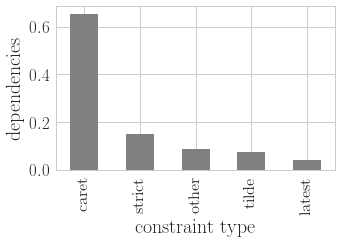

In [19]:
a=dep_ver.groupby('type').count()
a.sort_values(['dependency'], ascending=False, inplace=True)
a['package']=a['dependency'].apply(lambda x: float(x)/float(46945797))
ax=a.plot(kind='bar', y='package', color='gray')
ax.figure.set_size_inches(5,3)
ax.set_xlabel('constraint type')
ax.set_ylabel('dependencies')
ax.legend('')
#ax.figure.savefig('../../seneca_research/ICSR2018/figures/tilde_caret.pdf', bbox_inches='tight', facecolor='white')

In [59]:
# not to be considered 
dep_ver=dep_ver.query('dependency_version!="False" and dependency_date!="l" and latest_dependency_release>=dependency_date')
a=len(dep_ver)
float(a)/46945797

0.983254496669851

In [60]:
dev_per_outdated=dep_ver.query('dependency_version!="False"')
dev_per_outdated=dev_per_outdated.query('latest_dependency_release!=dependency_date')
dev_per_outdated=dev_per_outdated.query('type!="latest"')
dev_per_outdated=dev_per_outdated.query('dependency_date!="l"')
len(dev_per_outdated)

11368780

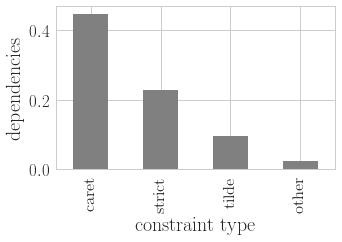

In [61]:
a=dev_per_outdated.groupby('type').count()
a.sort_values(['dependency'], ascending=False, inplace=True)
a['package']=a['dependency'].apply(lambda x: float(x)/float(14288131))
ax=a.plot(kind='bar', y='package', color='gray')
ax.figure.set_size_inches(5,3)
ax.set_xlabel('constraint type')
ax.set_ylabel('dependencies')
ax.legend('')

In [62]:
dev_per_outdated['dependency_date']=pd.to_datetime(dev_per_outdated['dependency_date'])
dev_per_outdated['latest_dependency_release']=pd.to_datetime(dev_per_outdated['latest_dependency_release'])
dev_per_outdated['time']=dev_per_outdated['latest_dependency_release']- dev_per_outdated['dependency_date']

In [77]:
print(len(dev_per_outdated.groupby('package'))/len(dep_ver.groupby('package')), len(dev_per_outdated)/len(dep_ver))

0.5859555962075113 0.24629251000213043


In [79]:
len(dev_per_outdated)

11368780

In [12]:
dev_per_outdated=pd.read_csv('../icsr2018/csv/outdated_deps-20-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

dev_per_outdated['dependency_date']=dev_per_outdated['dependency_date'].apply(lambda x: str(x).split()[0])
dev_per_outdated['latest_dependency_release']=dev_per_outdated['latest_dependency_release'].apply(lambda x: str(x).split()[0])

dev_per_outdated['dependency_date']=pd.to_datetime(dev_per_outdated['dependency_date'])
dev_per_outdated['latest_dependency_release']=pd.to_datetime(dev_per_outdated['latest_dependency_release'])
dev_per_outdated['time']=dev_per_outdated['latest_dependency_release']- dev_per_outdated['dependency_date']
len(dev_per_outdated)

In [17]:
dev_per_outdated.head()

,dependency,package,package.1,version_date,dependency_constraint,dependency_kind,dependency_version,dependency_date,latest_dependency_release,type,time
0,zygon,ood,ood,2016-02-08 00:17:23 UTC,^0.0.4,runtime,0.0.4,2016-01-28,2016-01-30,caret,2 days
1,zygon,ood,ood,2016-02-05 21:26:27 UTC,^0.0.4,runtime,0.0.4,2016-01-28,2016-01-30,caret,2 days
2,zygon,ood,ood,2016-01-31 19:23:41 UTC,^0.0.4,runtime,0.0.4,2016-01-28,2016-01-30,caret,2 days
3,zygon,ood,ood,2016-02-07 14:09:36 UTC,^0.0.4,runtime,0.0.4,2016-01-28,2016-01-30,caret,2 days
4,zxcvbn,@parity/ui,@parity/ui,2017-09-28 11:35:42 UTC,4.4.1,runtime,4.4.1,2016-10-31,2017-02-07,strict,99 days


# Begin Analysis : tech_lag_updates-16-11.csv

In [31]:
tech_lag_calcul=pd.read_csv('../icsr2018/csv/tech_lag_updates-16-11.csv', sep=';', dtype=object, index_col=None)
len(tech_lag_calcul)
tech_lag_calcul['release_type']=tech_lag_calcul['major_release']+';'+tech_lag_calcul['minor_release']+';'+tech_lag_calcul['patch_release']

tech_lag_calcul['release_type']=tech_lag_calcul['release_type'].apply(lambda x: 'major release' if str(x).split(';')[0]!="False"
                                                     else 'minor release' if str(x).split(';')[1]!="False"
                                                     else 'patch release' if str(x).split(';')[2]!="False"
                                                     else 'first release')

In [32]:
tech_lag_calcul.head()

,package,version,date,major_release,minor_release,patch_release,added,removed,stayed,updated_major,updated_minor,updated_patch,updates,updates_inverse,updated_constraint,falses,release_type
0,@0x5e/react-native-alipay,0.1.0,2017-10-11,False,False,False,1,0,0,0,0,0,0,0,0,0,first release
1,@0x5e/react-native-alipay,0.2.0,2017-10-13,False,2,False,4,0,1,0,0,0,0,0,0,0,minor release
2,@0x5e/react-native-alipay,0.2.2,2017-10-18,False,False,5,3,1,4,0,0,0,0,0,0,0,patch release
3,@0x7/id-convert,0.0.1,2017-08-16,False,False,False,2,0,0,0,0,0,0,0,0,0,first release
4,@0x7/id-convert,0.0.2,2017-08-16,False,False,0,0,0,2,0,0,0,0,0,0,0,patch release


In [12]:
len(tech_lag_calcul.query('updates!="0"'))

1141484

In [13]:
len(tech_lag_calcul.query('updates_inverse!="0"'))

29855

In [15]:
a

,package,version,date,major_release,minor_release,patch_release,added,removed,stayed,updated_major,updated_minor,updated_patch,updates,updates_inverse,updated_constraint,falses
release_type,,,,,,,,,,,,,,,,
patch,0.800730,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571,2484571
minor,0.159021,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424,493424
major,0.040249,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887,124887


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


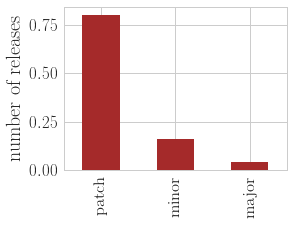

In [14]:
updates=tech_lag_calcul.query('release_type!="first release"')
updates['release_type']=updates['release_type'].apply(lambda x: str(x).split()[0])
a=updates.groupby('release_type').count()
a.sort_values(['package'], ascending=False, inplace=True)
a['package']=a['package'].apply(lambda x: float(x)/float(len(updates)))
ax=a.plot(kind='bar', y='package', color='brown')
ax.figure.set_size_inches(4,3)
ax.set_xlabel('')
ax.set_ylabel('number of releases')
ax.legend('')
#ax.figure.savefig('../../seneca_research/ICSR2018/figures/type_of_releases.pdf', bbox_inches='tight', facecolor='white')

In [39]:
updates=tech_lag_calcul.loc[:,['release_type','updated_major','updated_minor','updated_patch']]
updates['updated_major']=updates['updated_major'].apply(float)
updates['updated_minor']=updates['updated_minor'].apply(float)
updates['updated_patch']=updates['updated_patch'].apply(float)
#updates['release_type']=updates['major_release']+';'+updates['minor_release']+';'+updates['patch_release']
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates=updates.query('release_type!="first release"')
# updates['time']=updates['release_type'].apply(lambda x: str(x).split(';')[0] if str(x).split(';')[0]!="False"
#                                                      else str(x).split(';')[1] if str(x).split(';')[1]!="False"
#                                                      else str(x).split(';')[2])
updates=updates.loc[:,['updated_major','updated_minor','updated_patch','release_type']]
len(updates)

3102882

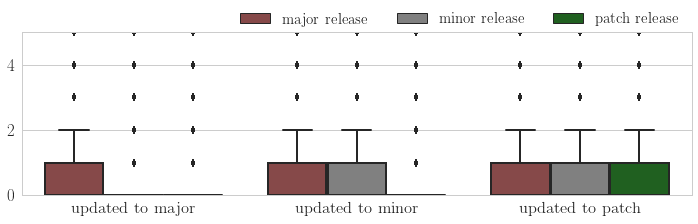

In [40]:
updates2=updates.rename(columns = {'updated_major':'updated to major','updated_minor':'updated to minor', 'updated_patch':'updated to patch'})
updates_2=pd.melt(updates2, id_vars=['release_type'], value_vars=['updated to major','updated to minor','updated to patch'])
updates_2=updates_2.rename(columns = {'variable':'updates'})
ax = sns.boxplot(y="value", x="updates", hue="release_type", data=updates_2, hue_order=['major release','minor release','patch release'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,5)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/updating.pdf', bbox_inches='tight', facecolor='white')

In [41]:
updates=tech_lag_calcul.loc[:,['release_type','added','stayed','removed']]
updates['added deps']=updates['added'].apply(float)
updates['stayed deps']=updates['stayed'].apply(float)
updates['removed deps']=updates['removed'].apply(float)
updates=updates.query('release_type!="first release"')
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates=updates.loc[:,['added deps','removed deps','stayed deps','release_type']]
len(updates)

3102882

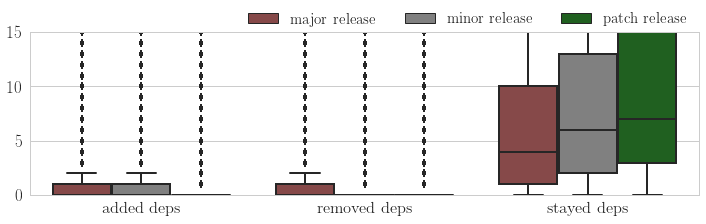

In [42]:
updates_2=pd.melt(updates, id_vars=['release_type'], value_vars=['added deps','removed deps','stayed deps'])
updates_2=updates_2.rename(columns = {'variable':'deps'})
ax = sns.boxplot(y="value", x="deps", hue="release_type", data=updates_2, hue_order=['major release','minor release','patch release'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,15)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/added_removed_stayed_deps.pdf', bbox_inches='tight', facecolor='white')


In [44]:
updates=tech_lag_calcul.loc[:,['release_type','major_release','minor_release','patch_release']]
updates=updates.query('release_type!="first release"')
updates['release_type']=updates['major_release']+';'+updates['minor_release']+';'+updates['patch_release']
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates['time']=updates['release_type'].apply(lambda x: str(x).split(';')[0] if str(x).split(';')[0]!="False"
                                                     else str(x).split(';')[1] if str(x).split(';')[1]!="False"
                                                     else str(x).split(';')[2])
updates['time before releasing']=updates['time'].apply(float)
updates['release_type']=updates['release_type'].apply(lambda x: 'major release' if str(x).split(';')[0]!="False"
                                                     else 'minor release' if str(x).split(';')[1]!="False"
                                                     else 'patch release')
updates=updates.loc[:,['time before releasing','release_type']]


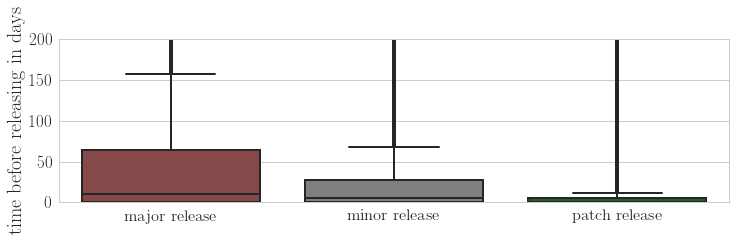

In [45]:
updates_2=updates
#updates_2=updates_2.rename(columns = {'variable':'deps'})
ax = sns.boxplot(y="time before releasing", x="release_type", data=updates_2, order=['major release','minor release','patch release'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,200)
ax.set_ylabel('time before releasing in days')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/time_before_releasing.pdf', bbox_inches='tight', facecolor='white')
